In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import itertools

### CSV Files Creation

In [4]:
path = '../data/MRI/Training'

arr = []
for root, folder, files in os.walk(path):
    # print(root, folder, files)
    for file in files:
        # print(f'{root} / {file} \n')
        root = "/".join(root.split('\\'))
        path = root+'/'+file
        label = root.split('/')[-1].split('\\')[-1]
        arr.append([path, label])
        
        print(path, label)
df = pd.DataFrame(columns=['path', 'label'], data=arr)
df.to_csv('../data/meta.csv', index=False)

../data/MRI/Training/AD/1.png AD
../data/MRI/Training/AD/10.png AD
../data/MRI/Training/AD/100.png AD
../data/MRI/Training/AD/101.png AD
../data/MRI/Training/AD/102.png AD
../data/MRI/Training/AD/103.png AD
../data/MRI/Training/AD/104.png AD
../data/MRI/Training/AD/105.png AD
../data/MRI/Training/AD/106.png AD
../data/MRI/Training/AD/107.png AD
../data/MRI/Training/AD/108.png AD
../data/MRI/Training/AD/109.png AD
../data/MRI/Training/AD/11.png AD
../data/MRI/Training/AD/110.png AD
../data/MRI/Training/AD/111.png AD
../data/MRI/Training/AD/112.png AD
../data/MRI/Training/AD/113.png AD
../data/MRI/Training/AD/114.png AD
../data/MRI/Training/AD/115.png AD
../data/MRI/Training/AD/116.png AD
../data/MRI/Training/AD/117.png AD
../data/MRI/Training/AD/118.png AD
../data/MRI/Training/AD/119.png AD
../data/MRI/Training/AD/12.png AD
../data/MRI/Training/AD/120.png AD
../data/MRI/Training/AD/121.png AD
../data/MRI/Training/AD/122.png AD
../data/MRI/Training/AD/123.png AD
../data/MRI/Training/AD/1

### Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split
meta = pd.read_csv('../data/meta.csv')

In [6]:
# train = pd.read_csv('../data/train.csv')
# path = train.loc[0][1]

X, y = meta.iloc[:,0], meta.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

xtest = pd.DataFrame(X_test)
xtrain = pd.DataFrame(X_train)
ytest = pd.DataFrame(y_test)
ytrain = pd.DataFrame(y_train)

train = pd.concat([xtrain, ytrain], axis=1)
test = pd.concat([xtest, ytest], axis=1)

train.to_csv('../data/train.csv')
test.to_csv('../data/test.csv')

### Metrics & Confusion Matrix

In [7]:
sys.path.insert(0,'C:/Users/mjan2021/PycharmProjects/Alzheimers_Brain_MRI/src')
from dataset import AlzheimersClassficiation
d = AlzheimersClassficiation('../data/AID/', '../data/train.csv')

In [15]:
from pycm import *
cm = np.load('../output_files/'+files[1])
cf = ConfusionMatrix(matrix=cm)
# stats = cf.stat()
# stats.AUC
cf.FN

{0: 2,
 1: 10,
 2: 0,
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 2,
 8: 1,
 9: 0,
 10: 0,
 11: 0,
 12: 5,
 13: 0,
 14: 0,
 15: 0,
 16: 4,
 17: 0,
 18: 4,
 19: 5,
 20: 1,
 21: 1,
 22: 11,
 23: 1,
 24: 8,
 25: 0,
 26: 11,
 27: 0,
 28: 5,
 29: 0}

In [1]:
def plot_confusion_matrix(cm, class_names, save_fig_as='file_name_without_extension'):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, fontsize=8, horizontalalignment='right')
    plt.yticks(tick_marks, class_names, fontsize=8)

    # Normalize the confusion matrix.
    # cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color, fontsize=7)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'../save/{save_fig_as}.png')
    # return figure

In [12]:
#  Get list of files
files = os.listdir('../output_files/')
files

['EfficientNet_Fold0.npy',
 'EfficientNet_Fold1.npy',
 'ResNet_Fold0.npy',
 'ResNet_Fold1.npy']

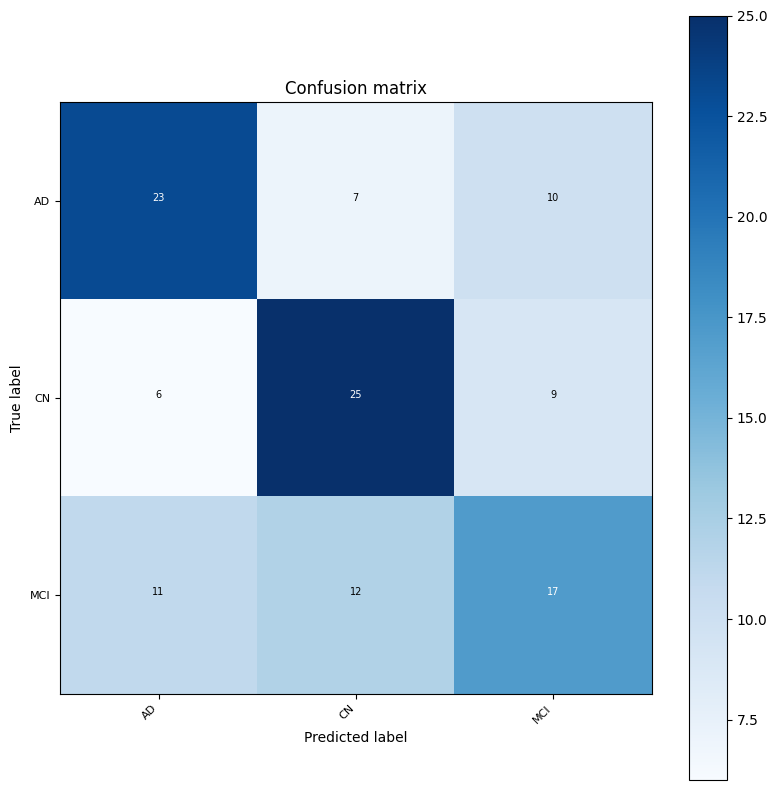

In [15]:
# Plot the confusion Matrix
Selected_file = files[1]
ar = np.load('../output_files/'+Selected_file) 
plot_confusion_matrix(ar, d.classes, save_fig_as=Selected_file)

### Class Distribution of Scenes

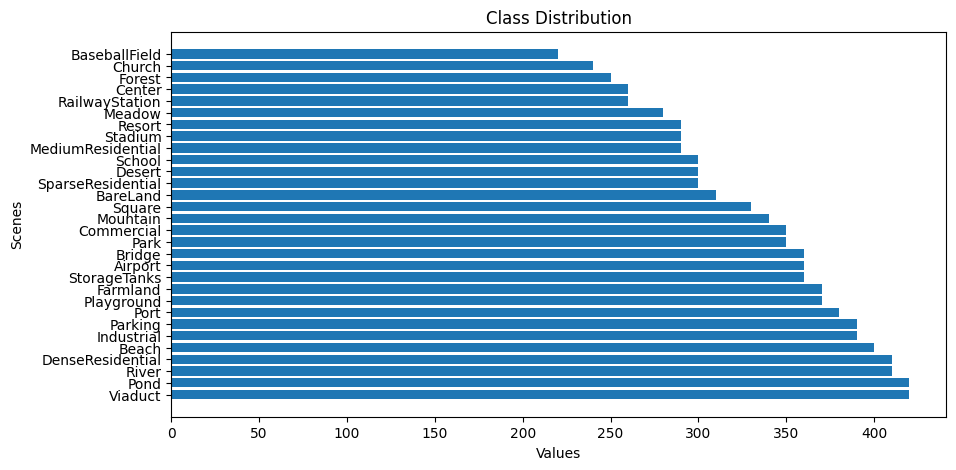

In [45]:
meta = pd.read_csv('../data/meta.csv')
clss = meta['label'].value_counts()

# Remove the limiter (10) to show all classes
data = dict(clss)
x = list(data.keys())
h = list(data.values())

fig = plt.figure(figsize = (10, 5))
plt.barh(x,h)
plt.xlabel("Values")
plt.ylabel("Scenes")
plt.title("Class Distribution")
plt.savefig('../save/class_distribution.png')
plt.show()